<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/Solution/Lab6_ClassificationModels_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6. Classification Models

version 001


Classification Models มีหลายนั้นมีมากมาย ใน lab นี้จะสรุปตัวหลักๆ เพื่อให้ได้รู้จักและได้ทดลองใช้กัน แต่ก่อนอื่นลองดูข้อมูลที่จะใช้ใน lab นี้กันก่อน


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

นำเข้าข้อมูล admit.csv

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv")
y = data.Label
X = data[['SubjectA','SubjectB']]

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
type(X)

pandas.core.frame.DataFrame

แสดงกราฟด้วย pairplot

In [ ]:
import seaborn as sns

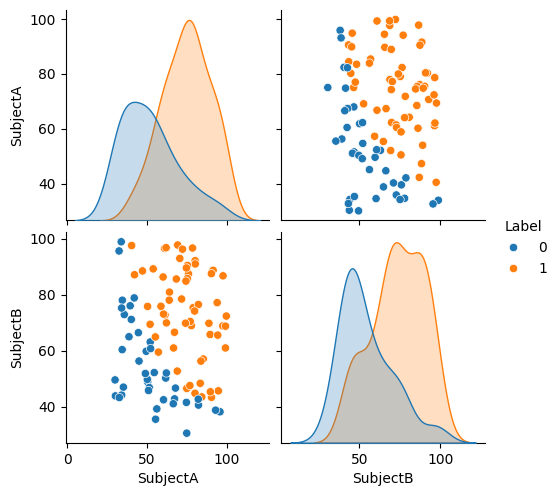

In [ ]:
sns.pairplot(data,hue= 'Label')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
mLg = LogisticRegression()

In [ ]:
mLg.fit(X,y)

LogisticRegression()

In [ ]:
mLg.score(X,y)

0.89

## Neural Network

Model Theory
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised

Library Details
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

ตัวแปรสำคัญในการใช้ model
* solver : เป็นพารามิเตอร์ที่ใช้ กำหนดอัลกอริทึมในการทำ  optimisation
* alpha : เป็นสเต็ปในการปรับค่าพารามิเตอร์ของโมเดลในขณะที่ทำ optimisation
* hidden_layer_sizes : เป็นขนาดของ Hidden เลเยอร์ในเน็ตเวิร์คในแบบจำลอง
* random_state : กำหนดค่าเริ่มต้นให้กับ การสร้างการสุ่มในการจัดเรียงข้อมูล
* max_iter : จำนวนรอบในการฝึกแบบจำลอง

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(10,10,10),
                   random_state= 10,
                   max_iter = 2000)


In [ ]:
nn.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10, 10), max_iter=2000,
              random_state=10, solver='lbfgs')

In [ ]:
X.shape

(100, 2)

In [ ]:
nn.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
nn.score(X,y)

1.0

## Support Vector Machine (SVM)

Model Theory
https://scikit-learn.org/stable/modules/svm.html

Library Details
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


ตัวแปรที่สำคัญ

* C: เป็นพารามิเตอร์ที่ใช้ควบคุมความไวในการเกิด overfitting  มีค่า default = 1.0
* kernel : ตัวที่ใช้กำหนดชนิดของ kernel ในการฝึกแบบจำลอง  มีค่า defualt = 'rbf'.  {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [ ]:
from sklearn.svm import SVC
svc = SVC(C = 1, kernel = "poly" )

In [ ]:
svc.fit(X,y)
svc.score(X,y)

1.0

## K-Nearest Neighbors (KNN)

Model Theory
https://scikit-learn.org/stable/modules/neighbors.html#classification

Library Details
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

ตัวแปรที่สำคัญ

* n_neighbors : จำนวนของสมาชิกข้างเคียงที่ใช้ในการคำนวณ  default= 5, int

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)

In [ ]:
knn.fit(X,y)
knn.score(X,y)

0.94

## Naive Bayes

Model Theory
https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

Library Details
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

ตัวแปรที่สำคัญ
* None

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X,y)
gnb.score(X,y)

0.93

# Random Forests


https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state= 0)
clf = clf.fit(X, y)
clf.score(X,y)

1.0

## Gradient Boosted Trees

https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosted-trees

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100)
clf.fit(X,y)
clf.score(X,y)

0.96

## Confusion Matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


micro and macro average

https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging

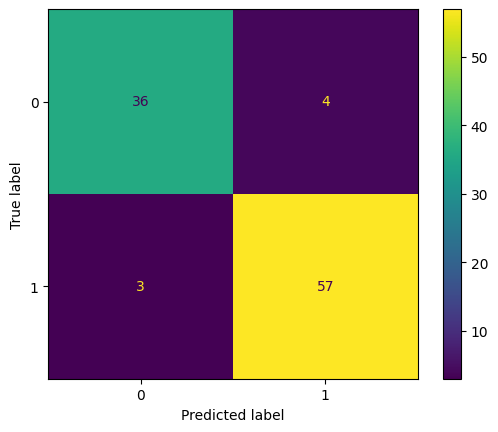

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X,y)  # Change the model here
predictions = gnb.predict(X) #

cm = confusion_matrix(y, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

In [ ]:
cm

array([[36,  4],
       [ 3, 57]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y,predictions, average='micro')

(0.93, 0.93, 0.93, None)

In [ ]:
## Precision as micro average
(57 + 36)/(60 + 40)

0.93

In [ ]:
precision_recall_fscore_support(y,predictions, average='binary')

(0.9344262295081968, 0.95, 0.9421487603305785, None)

In [ ]:
# Precision as binary
57/61

0.9344262295081968

In [ ]:
precision_recall_fscore_support(y,predictions, average='macro')

(0.92875157629256, 0.925, 0.9267705826969348, None)

In [ ]:
## Precision as macro average
((57/61)+(36/39))/2

## Exercise 1

#### Ex. 1.1  
จงใช้ข้อมูล Iris เพื่อทำสร้างแบบจำลองต่อไปนี้

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

#### Ex. 1.1
จงเตรียมข้อมูลเพื่อการสร้างแบบจำลอง โดยให้เก็บข้อมูลอยู่ในรูปแบบของ numpy array โดย X เป็น data และ y เก็บค่า  target


In [ ]:
X = iris.data

In [ ]:
y = iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Ex. 1.2
จงสร้างและฝึกโมเดล Neural Network  ที่มี  hidden layer size =  (10 ,10)


In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10,10), max_iter= 1000)

In [ ]:
nn.fit(X,y)
nn.score(X,y)

0.9866666666666667

### Ex. 1.3|
จงสร้างและฝึกโมเดล SVM ที่มีค่า C = 2

In [ ]:
from sklearn.svm import SVC
svc = SVC(C = 2)

In [ ]:
svc.fit(X,y)
svc.score(X,y)

0.9866666666666667

### Ex. 1.4
จงคำนวณค่า Precesion, Recall และค่า F1 Score ของ Neural Network Model แบบ macro

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_recall_fscore_support(y,nn.predict(X), average='macro')

(0.9871794871794872, 0.9866666666666667, 0.9866613311991462, None)

In [ ]:
precision_recall_fscore_support(y,nn.predict(X))

(array([1.        , 1.        , 0.96153846]),
 array([1.  , 0.96, 1.  ]),
 array([1.        , 0.97959184, 0.98039216]),
 array([50, 50, 50]))

In [ ]:
precision_recall_fscore_support(y,nn.predict(X), average='micro')

(0.9866666666666667, 0.9866666666666667, 0.9866666666666667, None)